In [3]:
import pandas as pd
from metric.eval_one_image import evaluation_one

# Danh sách lưu kết quả từng ảnh
num_images = 80

for method in ["BTSFusion", "CrossFuse", "MaEFuse", "MPCFusion", "PSLPT", "TextFusion", "LUT-Fuse"]:
    results = []
    for i in range(num_images):
        number_image = i + 1
        code_image = f"{number_image:02d}"

        ir_image = f"C:\\Users\\ADMIN\\OneDrive - Hanoi University of Science and Technology\\Desktop\\Medical Image Fusion\\MSRS\\MSRS_80\\ir\\{code_image}.png"
        vi_image = f"C:\\Users\\ADMIN\\OneDrive - Hanoi University of Science and Technology\\Desktop\\Medical Image Fusion\\MSRS\\MSRS_80\\vi\\{code_image}.png"
        fused_image = f"C:\\PVH\\SourceCode\\LP+nestfuse\\MSRS_compare\\{method}\\{code_image}.png"

        EN, MI, SF, AG, SD, MLI, CC, SCD, VIF, MSE, PSNR, Qabf, Nabf, SSIM, MS_SSIM = \
            evaluation_one(ir_image, vi_image, fused_image)

        results.append({
            "Image": code_image,
            "EN": EN,
            "MI": MI,
            "SF": SF,
            "AG": AG,
            "SD": SD,
            "MLI": MLI,
            "CC": CC,
            "SCD": SCD,
            "VIF": VIF,
            "MSE": MSE,
            "PSNR": PSNR,
            "Qabf": Qabf,
            "Nabf": Nabf,
            "SSIM": SSIM,
            "MS_SSIM": MS_SSIM
        })

    # Tạo DataFrame
    df = pd.DataFrame(results)

    # Làm tròn cho đẹp
    df = df.round(6)

    # Tính trung bình
    mean_row = df.drop(columns=["Image"]).mean()
    mean_row["Image"] = "Mean"

    # Ghép dòng Mean vào cuối bảng
    df = pd.concat([df, mean_row.to_frame().T], ignore_index=True)

    # Lưu ra Excel
    output_excel = f"C:\\PVH\\SourceCode\\LP+nestfuse\\MSRS_compare\\{method}\\metrics_MSRS.xlsx"
    df.to_excel(output_excel, index=False)

    print(f"✓ Saved metrics to {output_excel}")
    print(df)


torch.Size([1, 1, 1, 480, 640]) torch.Size([1, 1, 1, 480, 640])
torch.Size([1, 1, 1, 480, 640]) torch.Size([1, 1, 1, 480, 640])
torch.Size([1, 1, 1, 480, 640]) torch.Size([1, 1, 1, 480, 640])
torch.Size([1, 1, 1, 480, 640]) torch.Size([1, 1, 1, 480, 640])
torch.Size([1, 1, 1, 480, 640]) torch.Size([1, 1, 1, 480, 640])
torch.Size([1, 1, 1, 480, 640]) torch.Size([1, 1, 1, 480, 640])
torch.Size([1, 1, 1, 480, 640]) torch.Size([1, 1, 1, 480, 640])
torch.Size([1, 1, 1, 480, 640]) torch.Size([1, 1, 1, 480, 640])
torch.Size([1, 1, 1, 480, 640]) torch.Size([1, 1, 1, 480, 640])
torch.Size([1, 1, 1, 480, 640]) torch.Size([1, 1, 1, 480, 640])
torch.Size([1, 1, 1, 480, 640]) torch.Size([1, 1, 1, 480, 640])
torch.Size([1, 1, 1, 480, 640]) torch.Size([1, 1, 1, 480, 640])
torch.Size([1, 1, 1, 480, 640]) torch.Size([1, 1, 1, 480, 640])
torch.Size([1, 1, 1, 480, 640]) torch.Size([1, 1, 1, 480, 640])
torch.Size([1, 1, 1, 480, 640]) torch.Size([1, 1, 1, 480, 640])
torch.Size([1, 1, 1, 480, 640]) torch.Si

In [ ]:
from base_fusion.training import train_fusion

train_fusion(
    root_dir="C://Users//ADMIN//OneDrive - Hanoi University of Science and Technology//Desktop//AGF_IVIF//data//training_model",
    folder_train_outpath="C://Users//ADMIN//OneDrive - Hanoi University of Science and Technology//Desktop//AGF_IVIF//base_fusion//run//train_1",
    epochs=50,
    batch_size=4,
    lr=1e-4,
    device="cuda"
)

#### Chạy Z-score

===== Z-score Table (per metric) =====
              MI      QG      EN      SD     ALI    Time
levels_1  1.6409 -1.7403 -1.6423 -1.5275  1.6189 -1.4116
levels_2  0.5157 -0.4036 -0.5120 -0.6317  0.5522 -0.7198
levels_3 -0.2078  0.3216  0.2062  0.1111 -0.2020  0.0081
levels_4 -0.7512  0.7617  0.7497  0.7430 -0.7666  0.7187
levels_5 -1.1976  1.0606  1.1984  1.3051 -1.2024  1.4046

===== Overall Effectiveness Ranking =====
     Method  Zscore_Total  Rank
0  levels_5        2.5686     1
1  levels_4        1.4554     2
2  levels_3        0.2372     3
3  levels_2       -1.1993     4
4  levels_1       -3.0619     5


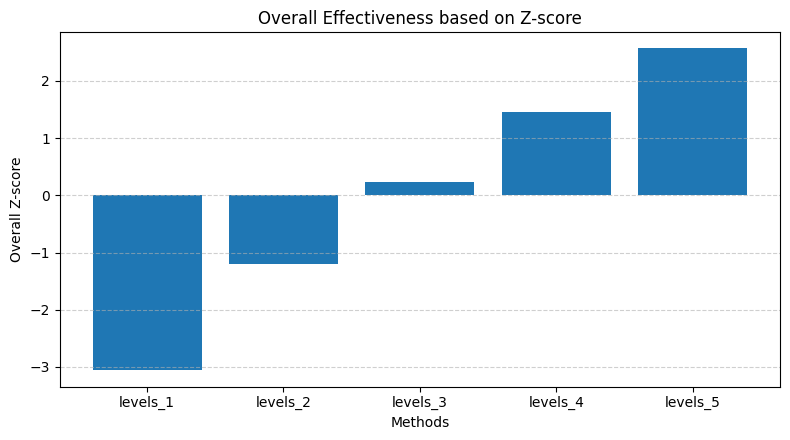

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# =======================
# 1. Input data
# =======================

method_names = [
    "levels_1",
    "levels_2",
    "levels_3",
    "levels_4",
    "levels_5",
]

metric_names = ["MI", "QG", "EN", "SD", "ALI", "Time"]

Q = np.array([
    [4.912034461, 0.589559212, 6.930745599, 0.154361519, 0.564271935, 0.345635846],
    [4.705277103, 0.601655263, 6.951041800, 0.154796788, 0.563986167, 0.429234763],
    [4.572337232, 0.608218032, 6.963937258, 0.155157758, 0.563784131, 0.517190594],
    [4.472479587, 0.612201339, 6.973696660, 0.155464810, 0.563632867, 0.603062186],
    [4.390454410, 0.614906081, 6.981752738, 0.155737922, 0.563516106, 0.685942631],
])

# =======================
# 2. Z-score normalization
# (same as MATLAB: zscore(Q))
# =======================

mean = Q.mean(axis=0)
std = Q.std(axis=0, ddof=0)   # ddof=0 giống MATLAB
Z = (Q - mean) / std

Z_table = pd.DataFrame(
    Z,
    index=method_names,
    columns=metric_names
)

# =======================
# 3. Overall effectiveness score
# =======================

score = Z.sum(axis=1)

# =======================
# 4. Ranking
# =======================

ranking_df = pd.DataFrame({
    "Method": method_names,
    "Zscore_Total": score
})

ranking_df = ranking_df.sort_values(
    by="Zscore_Total",
    ascending=False
).reset_index(drop=True)

ranking_df["Rank"] = ranking_df.index + 1

# =======================
# 5. Display results
# =======================

print("===== Z-score Table (per metric) =====")
print(Z_table.round(4))

print("\n===== Overall Effectiveness Ranking =====")
print(ranking_df.round(4))

# =======================
# 6. Bar plot
# =======================

plt.figure(figsize=(8, 4.5))
plt.bar(method_names, score)
plt.grid(True, axis="y", linestyle="--", alpha=0.6)
plt.xlabel("Methods")
plt.ylabel("Overall Z-score")
plt.title("Overall Effectiveness based on Z-score")
plt.tight_layout()
plt.show()


===== Z-score Table (per metric, Time inverted) =====
              MI      QG      EN      SD     ALI    Time
levels_1  1.5112 -1.7762  1.9232 -1.6644  1.5663  1.4601
levels_2  0.6098 -0.3515 -0.1658 -0.4994  0.6054  0.6570
levels_3 -0.0587  0.3632 -0.8660  0.2419 -0.1542  0.0226
levels_4 -0.7036  0.7541 -0.6974  0.7669 -0.7623 -0.7991
levels_5 -1.3587  1.0104 -0.1940  1.1549 -1.2552 -1.3406

===== Overall Effectiveness Ranking =====
     Method  Zscore_Total  Rank
0  levels_1        3.0201     1
1  levels_2        0.8556     2
2  levels_3       -0.4512     3
3  levels_4       -1.4414     4
4  levels_5       -1.9831     5


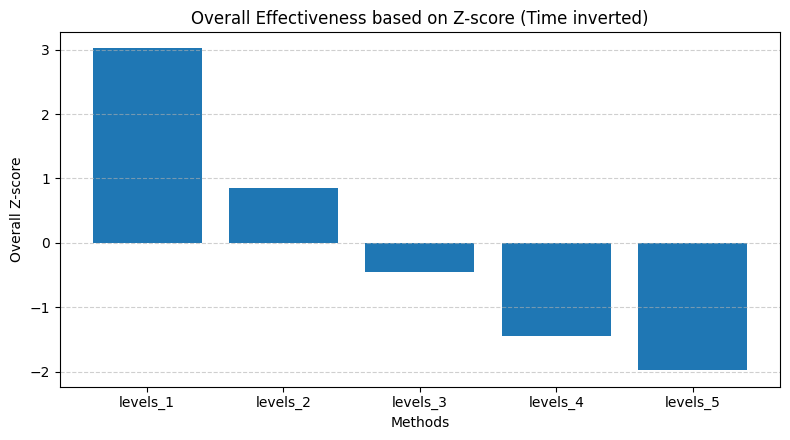

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# =======================
# 1. Input data
# =======================

method_names = [
    "levels_1",
    "levels_2",
    "levels_3",
    "levels_4",
    "levels_5",
]

metric_names = ["MI", "QG", "EN", "SD", "ALI", "Time"]

import numpy as np

Q = np.array([
    [4.230602551, 0.858559774, 4.608296377, 0.311669889, 0.247266942, 0.062944353],
    [4.211739928, 0.868730532, 4.599893092, 0.311804986, 0.246583008, 0.088144731],
    [4.197752926, 0.873831943, 4.597076072, 0.311890944, 0.246042282, 0.108048357],
    [4.184257928, 0.876622473, 4.597754306, 0.311951827, 0.245609488, 0.133831719],
    [4.170551302, 0.878452050, 4.599779676, 0.311996812, 0.245258662, 0.150822433],
])


# =======================
# 2. Invert Time (lower is better)
# =======================

Q[:, -1] = -Q[:, -1]   # đảo chiều cột Time

# =======================
# 3. Z-score normalization
# =======================

mean = Q.mean(axis=0)
std = Q.std(axis=0, ddof=0)   # ddof=0 giống MATLAB
Z = (Q - mean) / std

Z_table = pd.DataFrame(
    Z,
    index=method_names,
    columns=metric_names
)

# =======================
# 4. Overall effectiveness score
# =======================

score = Z.sum(axis=1)

# =======================
# 5. Ranking
# =======================

ranking_df = pd.DataFrame({
    "Method": method_names,
    "Zscore_Total": score
})

ranking_df = ranking_df.sort_values(
    by="Zscore_Total",
    ascending=False
).reset_index(drop=True)

ranking_df["Rank"] = ranking_df.index + 1

# =======================
# 6. Display results
# =======================

print("===== Z-score Table (per metric, Time inverted) =====")
print(Z_table.round(4))

print("\n===== Overall Effectiveness Ranking =====")
print(ranking_df.round(4))

# =======================
# 7. Bar plot
# =======================

plt.figure(figsize=(8, 4.5))
plt.bar(method_names, score)
plt.grid(True, axis="y", linestyle="--", alpha=0.6)
plt.xlabel("Methods")
plt.ylabel("Overall Z-score")
plt.title("Overall Effectiveness based on Z-score (Time inverted)")
plt.tight_layout()
plt.show()


===== Z-score Table (per metric, Time inverted) =====
                        MI      QG      EN      SD     ALI    Time
levels_1_mva_wle_3  1.9379 -0.0993  0.0105  1.0714  1.4533 -0.2476
levels_1_mva_wle_5  1.6760 -0.4533 -0.9151  1.3981  1.5308  1.8095
levels_1_mva_wle_7  1.3757 -0.8743 -1.6711  1.6469  1.5742  1.8252
levels_2_mva_wle_3  0.6630  0.3256  0.7454  0.0201  0.5338  0.6827
levels_2_mva_wle_5  0.5145 -0.4483 -0.3759  0.5597  0.6438  0.6410
levels_2_mva_wle_7  0.2479 -1.3015 -1.1987  0.9014  0.7113  0.6016
levels_3_mva_wle_3 -0.1752  0.9946  1.2331 -0.7882 -0.2282  0.2910
levels_3_mva_wle_5 -0.1944 -0.1034 -0.0207 -0.0290 -0.0893  0.4389
levels_3_mva_wle_7 -0.4023 -1.2292 -0.8978  0.3889 -0.0019  0.2459
levels_4_mva_wle_3 -0.7687  1.6198  1.5830 -1.4476 -0.8796 -0.8894
levels_4_mva_wle_5 -0.6737  0.3154  0.2683 -0.4904 -0.7212 -0.8643
levels_4_mva_wle_7 -0.8281 -0.9828 -0.6574 -0.0073 -0.6231 -0.9061
levels_5_mva_wle_3 -1.2309  2.1949  1.8553 -2.0198 -1.4506 -1.1335
levels_5

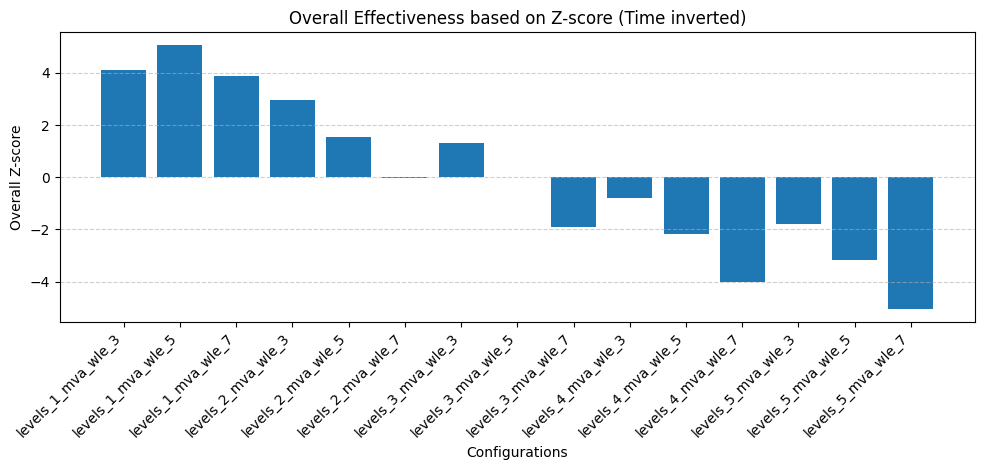

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# =======================
# 1. Input data
# =======================

method_names = [
    "levels_1_mva_wle_3",
    "levels_1_mva_wle_5",
    "levels_1_mva_wle_7",
    "levels_2_mva_wle_3",
    "levels_2_mva_wle_5",
    "levels_2_mva_wle_7",
    "levels_3_mva_wle_3",
    "levels_3_mva_wle_5",
    "levels_3_mva_wle_7",
    "levels_4_mva_wle_3",
    "levels_4_mva_wle_5",
    "levels_4_mva_wle_7",
    "levels_5_mva_wle_3",
    "levels_5_mva_wle_5",
    "levels_5_mva_wle_7",
]

metric_names = ["MI", "QG", "EN", "SD", "ALI", "Time"]

Q = np.array([
    [3.145910749, 0.652718117, 4.260801991, 0.358842443, 0.271273395, 0.116531839],
    [3.133059389, 0.651058446, 4.224749511, 0.359129034, 0.271387896, 0.060806374],
    [3.118328900, 0.649084766, 4.195299374, 0.359347286, 0.271451992, 0.060382148],

    [3.083365048, 0.654710022, 4.289427343, 0.357920296, 0.269914054, 0.091330389],
    [3.076077121, 0.651081895, 4.245749425, 0.358393654, 0.270076704, 0.092460245],
    [3.063000487, 0.647082065, 4.213702152, 0.358693314, 0.270176432, 0.093529294],

    [3.042245575, 0.657846295, 4.308427360, 0.357211322, 0.268787499, 0.101941814],
    [3.041301380, 0.652698703, 4.259588039, 0.357877222, 0.268992946, 0.097936193],
    [3.031102469, 0.647421292, 4.225421205, 0.358243823, 0.269122140, 0.103163193],

    [3.013128802, 0.660777038, 4.322057155, 0.356632912, 0.267824559, 0.133918037],
    [3.017788664, 0.654662272, 4.270844411, 0.357472492, 0.268058752, 0.133238693],
    [3.010212848, 0.648576037, 4.234785968, 0.357896286, 0.268203765, 0.134370685],

    [2.990453972, 0.663473040, 4.332662656, 0.356130969, 0.266980524, 0.140531083],
    [3.001297669, 0.656597551, 4.279797388, 0.357138328, 0.267235341, 0.143614888],
    [2.995302862, 0.649965223, 4.242592151, 0.357610644, 0.267387714, 0.143629074],
])


# =======================
# 2. Invert Time (lower is better)
# =======================

Q[:, -1] = -Q[:, -1]

# =======================
# 3. Z-score normalization
# =======================

mean = Q.mean(axis=0)
std = Q.std(axis=0, ddof=0)   # giống MATLAB
Z = (Q - mean) / std

Z_table = pd.DataFrame(
    Z,
    index=method_names,
    columns=metric_names
)

# =======================
# 4. Overall effectiveness score
# =======================

score = Z.sum(axis=1)

# =======================
# 5. Ranking
# =======================

ranking_df = pd.DataFrame({
    "Method": method_names,
    "Zscore_Total": score
})

ranking_df = ranking_df.sort_values(
    by="Zscore_Total",
    ascending=False
).reset_index(drop=True)

ranking_df["Rank"] = ranking_df.index + 1

# =======================
# 6. Display results
# =======================

print("===== Z-score Table (per metric, Time inverted) =====")
print(Z_table.round(4))

print("\n===== Overall Effectiveness Ranking =====")
print(ranking_df.round(4))

# =======================
# 7. Bar plot
# =======================

plt.figure(figsize=(10, 4.8))
plt.bar(method_names, score)
plt.xticks(rotation=45, ha="right")
plt.grid(True, axis="y", linestyle="--", alpha=0.6)
plt.xlabel("Configurations")
plt.ylabel("Overall Z-score")
plt.title("Overall Effectiveness based on Z-score (Time inverted)")
plt.tight_layout()
plt.show()


===== Z-score Table (Time inverted) =====
                MI      QG      EN      SD     ALI    Time
BTSFusion  -0.8442 -0.9532 -0.7910 -1.2327  0.6542  1.2852
CrossFuse  -0.2015 -0.7069  0.2150 -0.6478  1.0868 -1.5994
MPCFusion  -0.8639 -0.3881  0.6304 -0.0717 -0.7547 -0.4511
NestFuse    1.3917  1.2940  0.6911  1.5288  0.4199  0.7143
PSLPT      -0.6585  0.9940 -0.4546 -1.3055 -1.6545 -0.4631
TextFusion  0.1536 -1.0068 -2.1285 -0.0094  0.1067  1.1358
MaEFuse    -0.8272 -0.7280  0.8019  0.3674 -1.1305 -1.1412
HDAFusion   1.8499  1.4950  1.0357  1.3708  1.2720  0.5194

===== Overall Effectiveness Ranking =====
       Method  Zscore_Total  Rank
0   HDAFusion        7.5429     1
1    NestFuse        6.0398     2
2  TextFusion       -1.7486     3
3   CrossFuse       -1.8537     4
4   BTSFusion       -1.8816     5
5   MPCFusion       -1.8990     6
6     MaEFuse       -2.6576     7
7       PSLPT       -3.5422     8


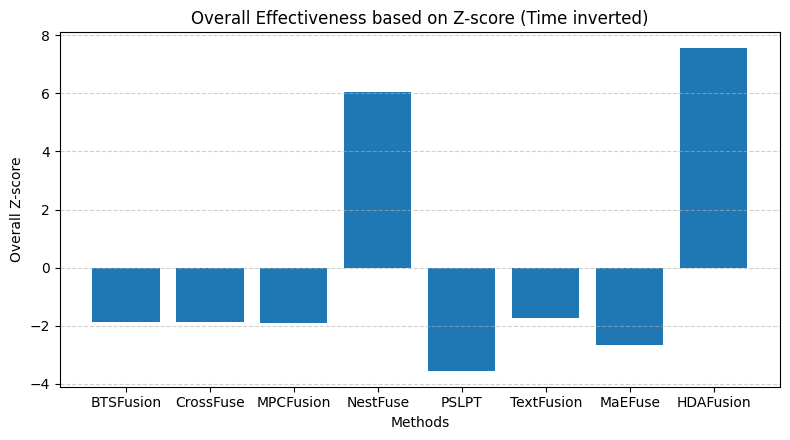

In [16]:
import numpy as np
import pandas as pd

# =======================
# 1. Input data
# =======================

method_names = [
    "BTSFusion",
    "CrossFuse",
    "MPCFusion",
    "NestFuse",
    "PSLPT",
    "TextFusion",
    "MaEFuse",
    "HDAFusion",
]

metric_names = ["MI", "QG", "EN", "SD", "ALI", "Time"]

import numpy as np

Q = np.array([
    [2.072970, 0.645040, 5.957787, 0.124926, 0.177546, 0.129862],
    [2.803748, 0.661714, 6.181881, 0.131847, 0.183803, 0.947951],
    [2.050643, 0.683293, 6.274434, 0.138663, 0.157166, 0.622277],
    [4.615177, 0.797152, 6.287955, 0.157602, 0.174157, 0.291785],
    [2.284171, 0.776847, 6.032722, 0.124064, 0.144151, 0.625695],
    [3.207515, 0.641411, 5.659857, 0.139401, 0.169626, 0.172249],
    [2.092314, 0.660282, 6.312638, 0.143859, 0.151730, 0.817992],
    [5.136089, 0.810761, 6.364714, 0.155733, 0.186482, 0.347044],
])


# =======================
# 2. Invert Time (lower is better)
# =======================

Q[:, -1] = -Q[:, -1]

# =======================
# 3. Z-score normalization
# =======================

mean = Q.mean(axis=0)
std = Q.std(axis=0, ddof=0)   # ddof=0 giống MATLAB
Z = (Q - mean) / std

Z_table = pd.DataFrame(
    Z,
    index=method_names,
    columns=metric_names
)

# =======================
# 4. Overall effectiveness score
# =======================

score = Z.sum(axis=1)

ranking_df = pd.DataFrame({
    "Method": method_names,
    "Zscore_Total": score
}).sort_values(
    by="Zscore_Total",
    ascending=False
).reset_index(drop=True)

ranking_df["Rank"] = ranking_df.index + 1

# =======================
# 5. Display results
# =======================

print("===== Z-score Table (Time inverted) =====")
print(Z_table.round(4))

print("\n===== Overall Effectiveness Ranking =====")
print(ranking_df.round(4))

# =======================
# 7. Bar plot
# =======================
plt.figure(figsize=(8, 4.5))
plt.bar(method_names, score)
plt.grid(True, axis="y", linestyle="--", alpha=0.6)
plt.xlabel("Methods")
plt.ylabel("Overall Z-score")
plt.title("Overall Effectiveness based on Z-score (Time inverted)")
plt.tight_layout()
plt.show()


In [4]:
import os
import cv2

def extract_Y_channel(folder_path, folder_path_out):
    os.makedirs(folder_path_out, exist_ok=True)

    valid_exts = (".jpg", ".jpeg", ".png", ".bmp", ".tif", ".tiff")

    for filename in os.listdir(folder_path):
        if not filename.lower().endswith(valid_exts):
            continue

        img_path = os.path.join(folder_path, filename)
        img = cv2.imread(img_path)

        if img is None:
            print(f"[WARNING] Cannot read image: {filename}")
            continue

        # BGR -> YUV
        img_yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)

        # Extract Y channel
        Y = img_yuv[:, :, 0]

        # Output path
        out_path = os.path.join(folder_path_out, filename)

        # Save grayscale Y channel
        cv2.imwrite(out_path, Y)

    print("Done extracting Y channel images.")

# =========================
# Example usage
# =========================
folder_path = "C:\\Users\\ADMIN\\Downloads\\Test\\Test\\MRI_SPECT\\SPECT"
folder_path_out = "C:\\Users\\ADMIN\\Downloads\\Test\\Test\\MRI_SPECT\\SPECT_Y"

extract_Y_channel(folder_path, folder_path_out)


Done extracting Y channel images.


In [12]:
import os
import cv2

def rename_and_convert_to_png(folder_path, folder_path_out):
    os.makedirs(folder_path_out, exist_ok=True)

    valid_exts = (".jpg", ".jpeg", ".png", ".bmp", ".tif", ".tiff")

    # Get & sort image list
    image_files = [
        f for f in os.listdir(folder_path)
        if f.lower().endswith(valid_exts)
    ]
    image_files.sort()

    num_digits = len(str(len(image_files)))  # auto padding

    for idx, filename in enumerate(image_files, start=1):
        img_path = os.path.join(folder_path, filename)
        img = cv2.imread(img_path)

        if img is None:
            print(f"[WARNING] Cannot read image: {filename}")
            continue

        new_name = f"{idx:0{num_digits}d}.png"
        out_path = os.path.join(folder_path_out, new_name)

        cv2.imwrite(out_path, img)

    print(f"Done. Converted {len(image_files)} images to PNG.")

# =========================
# Example usage
# =========================
folder_path = "C:\\Users\\ADMIN\\Downloads\\Test\\Test\\MRI_CT\\CT"
folder_path_out = "C:\\Users\\ADMIN\\Downloads\\Test\\Test\\MRI_CT\\ct_run"

rename_and_convert_to_png(folder_path, folder_path_out)


Done. Converted 24 images to PNG.


===== Z-score Table (Time inverted) =====
                        MI      QG      EN      SD     ALI    Time
levels_1_mva_wle_3  1.7674 -1.7475 -0.6437 -1.5075  0.1249 -0.2039
levels_1_mva_wle_5  1.7460 -1.8688  0.4339 -1.5754 -0.4735  1.7321
levels_1_mva_wle_7  1.7310 -1.9486  0.9346 -1.6064 -0.6998  1.5931
levels_2_mva_wle_3  0.4089 -0.0792 -0.8811 -0.5039  0.4878  0.7451
levels_2_mva_wle_5  0.3731 -0.1839  0.5510 -0.6188 -0.4865  0.8340
levels_2_mva_wle_7  0.3474 -0.2679  1.1921 -0.6772 -0.9171  0.8610
levels_3_mva_wle_3 -0.2821  0.4711 -1.2369  0.2945  1.0315  0.1980
levels_3_mva_wle_5 -0.3025  0.4003  0.4098  0.1381 -0.3512  0.2170
levels_3_mva_wle_7 -0.3227  0.3418  1.1552  0.0559 -0.9863  0.1650
levels_4_mva_wle_3 -0.7464  0.7414 -1.6213  0.9250  1.7044 -0.7941
levels_4_mva_wle_5 -0.7623  0.7042  0.1314  0.7297 -0.1422 -0.6607
levels_4_mva_wle_7 -0.7533  0.6721  0.9666  0.6249 -0.9869 -0.4923
levels_5_mva_wle_3 -1.0759  0.9345 -1.9648  1.4372  2.4595 -1.6940
levels_5_mva_wle_5 -

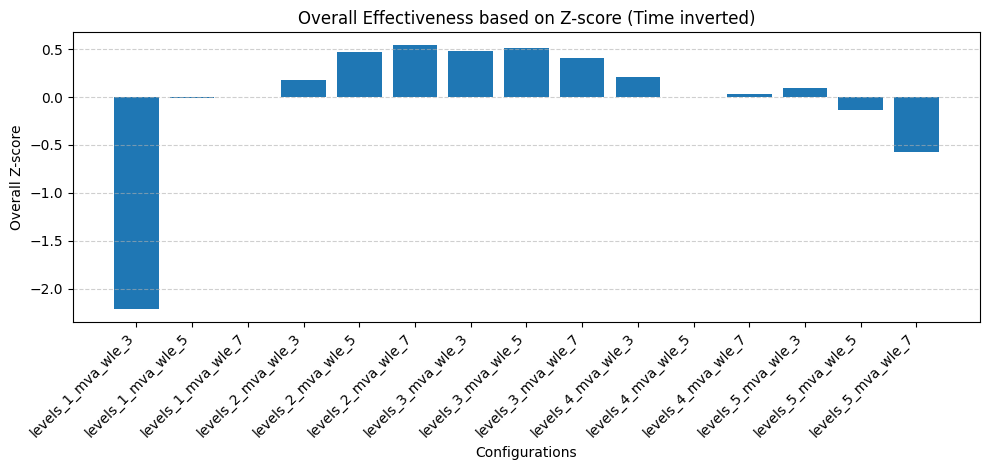

In [4]:
import numpy as np
import pandas as pd

# =======================
# 1. Input data
# =======================

method_names = [
    "levels_1_mva_wle_3",
    "levels_1_mva_wle_5",
    "levels_1_mva_wle_7",
    "levels_2_mva_wle_3",
    "levels_2_mva_wle_5",
    "levels_2_mva_wle_7",
    "levels_3_mva_wle_3",
    "levels_3_mva_wle_5",
    "levels_3_mva_wle_7",
    "levels_4_mva_wle_3",
    "levels_4_mva_wle_5",
    "levels_4_mva_wle_7",
    "levels_5_mva_wle_3",
    "levels_5_mva_wle_5",
    "levels_5_mva_wle_7",
]

metric_names = ["MI", "QG", "EN", "SD", "ALI", "Time"]

Q = np.array([
    [2.147055471, 0.728947080, 3.027955974, 0.192118640, 0.102825467, 0.075494277],
    [2.146405386, 0.727238105, 3.043727090, 0.191985368, 0.102754588, 0.045885891],
    [2.145947909, 0.726113899, 3.051054732, 0.191924558, 0.102727781, 0.048011482],

    [2.105719986, 0.752456344, 3.024481196, 0.194087178, 0.102868458, 0.060980493],
    [2.104631018, 0.750980805, 3.045440478, 0.193861869, 0.102753051, 0.059621489],
    [2.103846891, 0.749796762, 3.054823172, 0.193747154, 0.102702049, 0.059207428],

    [2.084692505, 0.760210082, 3.019274915, 0.195653172, 0.102932857, 0.069347966],
    [2.084074340, 0.759212227, 3.043374221, 0.195346358, 0.102769081, 0.069057429],
    [2.083458167, 0.758387962, 3.054283482, 0.195185111, 0.102693852, 0.069853401],

    [2.070565123, 0.764018595, 3.013649381, 0.196889878, 0.103012564, 0.084521085],
    [2.070081312, 0.763494929, 3.039299479, 0.196506906, 0.102793836, 0.082481915],
    [2.070355869, 0.763042250, 3.051522792, 0.196301280, 0.102693782, 0.079905069],

    [2.060541251, 0.766740045, 3.008621414, 0.197894551, 0.103102003, 0.098284733],
    [2.060642458, 0.766543595, 3.035146545, 0.197437547, 0.102827732, 0.090418005],
    [2.061142137, 0.766394298, 3.047999915, 0.197193798, 0.102703048, 0.092575341],
])

# =======================
# 2. Invert Time (lower is better)
# =======================

Q[:, -1] = -Q[:, -1]

# =======================
# 3. Z-score normalization
# =======================

mean = Q.mean(axis=0)
std = Q.std(axis=0, ddof=0)   # ddof=0 giống MATLAB
Z = (Q - mean) / std

Z_table = pd.DataFrame(
    Z,
    index=method_names,
    columns=metric_names
)

# =======================
# 4. Overall effectiveness score
# =======================

score = Z.sum(axis=1)

ranking_df = pd.DataFrame({
    "Method": method_names,
    "Zscore_Total": score
}).sort_values(
    by="Zscore_Total",
    ascending=False
).reset_index(drop=True)

ranking_df["Rank"] = ranking_df.index + 1

# =======================
# 5. Display results
# =======================

print("===== Z-score Table (Time inverted) =====")
print(Z_table.round(4))

print("\n===== Overall Effectiveness Ranking =====")
print(ranking_df.round(4))

# =======================
# 7. Bar plot
# =======================
from matplotlib import pyplot as plt
plt.figure(figsize=(10, 4.8))
plt.bar(method_names, score)
plt.xticks(rotation=45, ha="right")
plt.grid(True, axis="y", linestyle="--", alpha=0.6)
plt.xlabel("Configurations")
plt.ylabel("Overall Z-score")
plt.title("Overall Effectiveness based on Z-score (Time inverted)")
plt.tight_layout()
plt.show()


===== Z-score Table (Time inverted) =====
                        MI      QG      EN      SD     ALI    Time
levels_1_mva_wle_3  1.7674 -1.7475 -0.6437 -1.5075  0.1249 -0.2039
levels_1_mva_wle_5  1.7460 -1.8688  0.4339 -1.5754 -0.4735  1.7321
levels_1_mva_wle_7  1.7310 -1.9486  0.9346 -1.6064 -0.6998  1.5931
levels_2_mva_wle_3  0.4089 -0.0792 -0.8811 -0.5039  0.4878  0.7451
levels_2_mva_wle_5  0.3731 -0.1839  0.5510 -0.6188 -0.4865  0.8340
levels_2_mva_wle_7  0.3474 -0.2679  1.1921 -0.6772 -0.9171  0.8610
levels_3_mva_wle_3 -0.2821  0.4711 -1.2369  0.2945  1.0315  0.1980
levels_3_mva_wle_5 -0.3025  0.4003  0.4098  0.1381 -0.3512  0.2170
levels_3_mva_wle_7 -0.3227  0.3418  1.1552  0.0559 -0.9863  0.1650
levels_4_mva_wle_3 -0.7464  0.7414 -1.6213  0.9250  1.7044 -0.7941
levels_4_mva_wle_5 -0.7623  0.7042  0.1314  0.7297 -0.1422 -0.6607
levels_4_mva_wle_7 -0.7533  0.6721  0.9666  0.6249 -0.9869 -0.4923
levels_5_mva_wle_3 -1.0759  0.9345 -1.9648  1.4372  2.4595 -1.6940
levels_5_mva_wle_5 -

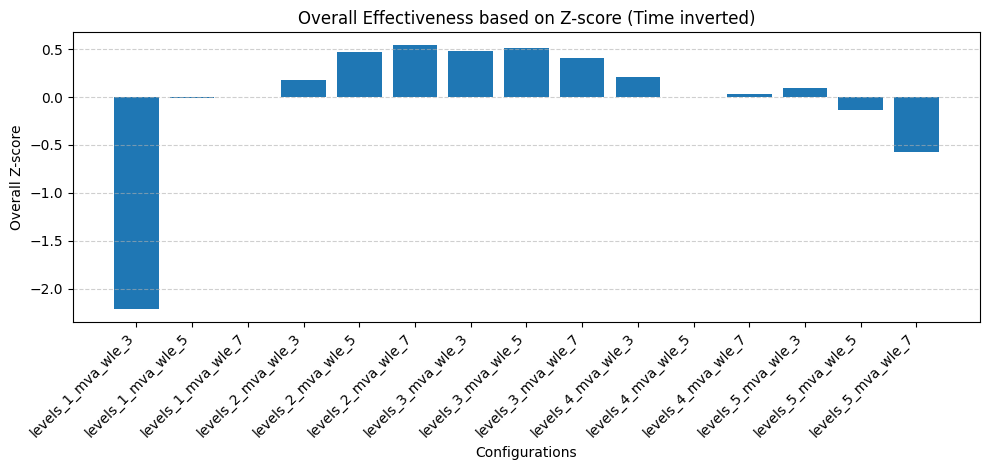

In [7]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# =======================
# 1. Input data (UPDATED)
# =======================

method_names = [
    "levels_1_mva_wle_3",
    "levels_1_mva_wle_5",
    "levels_1_mva_wle_7",
    "levels_2_mva_wle_3",
    "levels_2_mva_wle_5",
    "levels_2_mva_wle_7",
    "levels_3_mva_wle_3",
    "levels_3_mva_wle_5",
    "levels_3_mva_wle_7",
    "levels_4_mva_wle_3",
    "levels_4_mva_wle_5",
    "levels_4_mva_wle_7",
    "levels_5_mva_wle_3",
    "levels_5_mva_wle_5",
    "levels_5_mva_wle_7",
]

metric_names = ["MI", "QG", "EN", "SD", "ALI", "Time"]

import numpy as np

Q = np.array([
    [2.147055471, 0.728947080, 3.027955974, 0.192118640, 0.102825467, 0.075494277],
    [2.146405386, 0.727238105, 3.043727090, 0.191985368, 0.102754588, 0.045885891],
    [2.145947909, 0.726113899, 3.051054732, 0.191924558, 0.102727781, 0.048011482],

    [2.105719986, 0.752456344, 3.024481196, 0.194087178, 0.102868458, 0.060980493],
    [2.104631018, 0.750980805, 3.045440478, 0.193861869, 0.102753051, 0.059621489],
    [2.103846891, 0.749796762, 3.054823172, 0.193747154, 0.102702049, 0.059207428],

    [2.084692505, 0.760210082, 3.019274915, 0.195653172, 0.102932857, 0.069347966],
    [2.084074340, 0.759212227, 3.043374221, 0.195346358, 0.102769081, 0.069057429],
    [2.083458167, 0.758387962, 3.054283482, 0.195185111, 0.102693852, 0.069853401],

    [2.070565123, 0.764018595, 3.013649381, 0.196889878, 0.103012564, 0.084521085],
    [2.070081312, 0.763494929, 3.039299479, 0.196506906, 0.102793836, 0.082481915],
    [2.070355869, 0.763042250, 3.051522792, 0.196301280, 0.102693782, 0.079905069],

    [2.060541251, 0.766740045, 3.008621414, 0.197894551, 0.103102003, 0.098284733],
    [2.060642458, 0.766543595, 3.035146545, 0.197437547, 0.102827732, 0.090418005],
    [2.061142137, 0.766394298, 3.047999915, 0.197193798, 0.102703048, 0.092575341],
])


# =======================
# 2. Invert Time (lower is better)
# =======================

Q[:, -1] = -Q[:, -1]

# =======================
# 3. Z-score normalization
# =======================

mean = Q.mean(axis=0)
std = Q.std(axis=0, ddof=0)   # ddof=0 giống MATLAB
Z = (Q - mean) / std

Z_table = pd.DataFrame(
    Z,
    index=method_names,
    columns=metric_names
)

# =======================
# 4. Overall effectiveness score
# =======================

score = Z.sum(axis=1)

ranking_df = pd.DataFrame({
    "Method": method_names,
    "Zscore_Total": score
}).sort_values(
    by="Zscore_Total",
    ascending=False
).reset_index(drop=True)

ranking_df["Rank"] = ranking_df.index + 1

# =======================
# 5. Display results
# =======================

print("===== Z-score Table (Time inverted) =====")
print(Z_table.round(4))

print("\n===== Overall Effectiveness Ranking =====")
print(ranking_df.round(4))

# =======================
# 6. Bar plot
# =======================

plt.figure(figsize=(10, 4.8))
plt.bar(method_names, score)
plt.xticks(rotation=45, ha="right")
plt.grid(True, axis="y", linestyle="--", alpha=0.6)
plt.xlabel("Configurations")
plt.ylabel("Overall Z-score")
plt.title("Overall Effectiveness based on Z-score (Time inverted)")
plt.tight_layout()
plt.show()


In [10]:
import numpy as np
import pandas as pd

# =======================
# 1. Input data
# =======================

method_names = [
    "mva_wle=3",
    "mva_wle=5",
    "mva_wle=7",
]

metric_names = ["MI", "QG", "EN", "SD", "ALI", "Time"]

Q = np.array([
    [2.105719986, 0.752456344, 3.024481196, 0.194087178, 0.102868458, 0.060980493],
    [2.104631018, 0.750980805, 3.045440478, 0.193861869, 0.102753051, 0.059621489],
    [2.103846891, 0.749796762, 3.054823172, 0.193747154, 0.102702049, 0.059207428],
])

# =======================
# 2. Invert Time (lower is better)
# =======================

Q[:, -1] = -Q[:, -1]

# =======================
# 3. Z-score normalization
# =======================

mean = Q.mean(axis=0)
std = Q.std(axis=0, ddof=0)   # ddof=0 giống MATLAB

Z = (Q - mean) / std

Z_table = pd.DataFrame(
    Z,
    index=method_names,
    columns=metric_names
)

# =======================
# 4. Overall effectiveness score
# =======================

score = Z.sum(axis=1)

ranking_df = pd.DataFrame({
    "Method": method_names,
    "Zscore_Total": score
}).sort_values(
    by="Zscore_Total",
    ascending=False
).reset_index(drop=True)

ranking_df["Rank"] = ranking_df.index + 1

# =======================
# 5. Display results
# =======================

print("===== Z-score Table (Time inverted) =====")
print(Z_table.round(4))

print("\n===== Overall Effectiveness Ranking =====")
print(ranking_df.round(4))


===== Z-score Table (Time inverted) =====
               MI      QG      EN      SD     ALI    Time
mva_wle=3  1.2855  1.2670 -1.3482  1.3342  1.3495 -1.3785
mva_wle=5 -0.1323 -0.0893  0.3042 -0.2610 -0.3084  0.4159
mva_wle=7 -1.1532 -1.1776  1.0440 -1.0732 -1.0411  0.9626

===== Overall Effectiveness Ranking =====
      Method  Zscore_Total  Rank
0  mva_wle=3        2.5094     1
1  mva_wle=5       -0.0709     2
2  mva_wle=7       -2.4386     3


In [ ]:
import numpy as np
import pandas as pd
import itertools

# =========================================================
# 1. INPUT DATA
# =========================================================
df = pd.DataFrame({
    "Configure": [
        "levels_2_mva_wle_3",
        "levels_2_mva_wle_5",
        "levels_2_mva_wle_7"
    ],
    "MI":   [4.819539185, 4.90964814,  4.954750011],
    "QG":   [0.595722155, 0.598891431, 0.598547939],
    "EN":   [6.935314742, 6.929394266, 6.925479042],
    "SD":   [0.154320563, 0.154315891, 0.15430837 ],
    "ALI":  [0.564236382, 0.56400584,  0.563924816],
    "Time": [0.166619596, 0.167795772, 0.170899982]
})

metrics = ["MI", "QG", "EN", "SD", "ALI", "Time"]

# +1: càng cao càng tốt | -1: càng thấp càng tốt
direction = {
    "MI": 1,
    "QG": 1,
    "EN": 1,
    "SD": 1,
    "ALI": 1,
    "Time": -1
}

# =========================================================
# 2. Z-SCORE FUNCTION (MATLAB-COMPATIBLE)
# =========================================================
def matlab_zscore(x):
    mu = np.mean(x)
    sigma = np.std(x, ddof=1)   # MATLAB-compatible
    if sigma == 0:
        return np.zeros_like(x)
    return (x - mu) / sigma

# =========================================================
# 3. COMPUTE FOR ALL SUBSETS
# =========================================================
results = {cfg: [] for cfg in df["Configure"]}

for k in range(1, len(metrics) + 1):
    for subset in itertools.combinations(metrics, k):

        Z = pd.DataFrame(index=df.index)

        for m in subset:
            x = df[m].values * direction[m]   # invert if lower is better
            Z[m] = matlab_zscore(x)

        Z_total = Z.sum(axis=1)
        rank = Z_total.rank(ascending=False, method="dense").astype(int)

        for i, cfg in enumerate(df["Configure"]):
            results[cfg].append({
                "Metrics": ",".join(subset),
                "Num_Metrics": k,
                "Zscore_Target": round(Z_total.iloc[i], 4),
                "Rank_Target": int(rank.iloc[i])
            })

# =========================================================
# 4. EXPORT EXCEL FILES
# =========================================================
for cfg, rows in results.items():
    out_df = pd.DataFrame(rows)
    out_df.to_excel(f"{cfg}_zscore.xlsx", index=False)

print("✅ Finished! 3 Excel files have been created.")


In [5]:
import numpy as np
import pandas as pd

# =========================================================
# 1. INPUT DATA
# =========================================================
# data = {
#     "Configure": [
#         "levels_2_mva_wle_3",
#         "levels_2_mva_wle_5",
#         "levels_2_mva_wle_7"
#     ],
#     "MLI":  [0.56193728,  0.561706782, 0.561625761],
#     "CI":   [0.155134282, 0.155129608, 0.155122086],
#     "EN":   [6.8886,      6.882703,    6.878803],
#     "MI":   [4.051106,    4.140466,    4.185186],
#     "Qab/f":[0.539668,    0.546636,    0.548611]
# }

data = {
    "Configure": [
        "levels_2_mva_wle_3",
        "levels_2_mva_wle_5",
        "levels_2_mva_wle_7"
    ],
    "MLI":  [0.180021802, 0.179821837, 0.179746635],
    "CI":   [0.157611251, 0.15762798,  0.157628804],
    "EN":   [6.301184,    6.298899,    6.296929],
    "MI":   [4.195156,    4.272121,    4.305505],
    "Qab/f":[0.690475,    0.695876,    0.696514]
}

df = pd.DataFrame(data)

metrics = ["MLI", "CI", "EN", "MI", "Qab/f"]

# =========================================================
# 2. MATLAB-COMPATIBLE Z-SCORE
# =========================================================
Z = pd.DataFrame(index=df.index)

for m in metrics:
    x = df[m].values
    mu = np.mean(x)
    sigma = np.std(x, ddof=1)   # ddof=1 giống MATLAB

    if sigma == 0:
        Z[m] = np.zeros_like(x)  # MATLAB behavior
    else:
        Z[m] = (x - mu) / sigma

Z.columns = [f"Z_{m}" for m in metrics]

# =========================================================
# 3. OVERALL SCORE & RANKING
# =========================================================
df["Z_Total"] = Z.sum(axis=1)
df["Rank"] = df["Z_Total"].rank(
    ascending=False,
    method="dense"
).astype(int)

# =========================================================
# 4. FINAL RESULT
# =========================================================
result = pd.concat(
    [df[["Configure"]], Z, df[["Z_Total", "Rank"]]],
    axis=1
)

print(result)


            Configure     Z_MLI      Z_CI      Z_EN      Z_MI   Z_Qab/f  \
0  levels_2_mva_wle_3  1.113612 -1.153701  1.023742 -1.103327 -1.149351   
1  levels_2_mva_wle_5 -0.292419  0.535255 -0.049309  0.256703  0.478528   
2  levels_2_mva_wle_7 -0.821193  0.618446 -0.974433  0.846624  0.670823   

    Z_Total  Rank  
0 -1.269025     3  
1  0.928759     1  
2  0.340266     2  


In [3]:
import numpy as np
import pandas as pd

# =========================================================
# 1. INPUT DATA
# =========================================================

data = {
    "Configure": [
        "levels_2_mva_wle_3",
        "levels_2_mva_wle_5",
        "levels_2_mva_wle_7"
    ],
    "MLI":  [0.56193728,  0.561706782, 0.561625761],
    "CI":   [0.155134282, 0.155129608, 0.155122086],
    "EN":   [6.8886,      6.882703,    6.878803],
    "MI":   [4.051106,    4.140466,    4.185186],
    "Qab/f":[0.539668,    0.546636,    0.548611]
}

# data = {
#     "Configure": [
#         "levels_2_mva_wle_3",
#         "levels_2_mva_wle_5",
#         "levels_2_mva_wle_7"
#     ],
#     "MLI":  [0.180021802, 0.179821837, 0.179746635],
#     "CI":   [0.157611251, 0.15762798,  0.157628804],
#     "EN":   [6.301184,    6.298899,    6.296929],
#     "MI":   [4.195156,    4.272121,    4.305505],
#     "Qab/f":[0.690475,    0.695876,    0.696514]
# }

df = pd.DataFrame(data)

metrics = ["MLI", "CI", "EN", "MI", "Qab/f"]

# =========================================================
# ✨ BỔ SUNG: LÀM TRÒN 4 CHỮ SỐ THẬP PHÂN
# =========================================================
df[metrics] = df[metrics].round(4)

# =========================================================
# 2. MATLAB-COMPATIBLE Z-SCORE
# =========================================================
Z = pd.DataFrame(index=df.index)

for m in metrics:
    x = df[m].values
    mu = np.mean(x)
    sigma = np.std(x, ddof=1)   # ddof=1 giống MATLAB

    if sigma == 0:
        Z[m] = np.zeros_like(x)  # MATLAB behavior
    else:
        Z[m] = (x - mu) / sigma

Z.columns = [f"Z_{m}" for m in metrics]

# =========================================================
# 3. OVERALL SCORE & RANKING
# =========================================================
df["Z_Total"] = Z.sum(axis=1)
df["Rank"] = df["Z_Total"].rank(
    ascending=False,
    method="dense"
).astype(int)

# =========================================================
# 4. FINAL RESULT
# =========================================================
result = pd.concat(
    [df[["Configure"]], Z, df[["Z_Total", "Rank"]]],
    axis=1
)

print(result)


            Configure     Z_MLI  Z_CI     Z_EN      Z_MI   Z_Qab/f   Z_Total  \
0  levels_2_mva_wle_3  1.091089   0.0  1.06069 -1.091089 -1.127910 -0.067220   
1  levels_2_mva_wle_5 -0.218218   0.0 -0.13512  0.218218  0.349795  0.214675   
2  levels_2_mva_wle_7 -0.872872   0.0 -0.92557  0.872872  0.778115 -0.147455   

   Rank  
0     2  
1     1  
2     3  


In [6]:
import numpy as np
import pandas as pd
import itertools

# =========================================================
# 1. INPUT DATA
# =========================================================
df = pd.DataFrame({
    "Configure": [
        "levels_2_mva_wle_3",
        "levels_2_mva_wle_5",
        "levels_2_mva_wle_7"
    ],
    "MLI":   [0.56193728,  0.561706782, 0.561625761],
    "CI":    [0.155134282, 0.155129608, 0.155122086],
    "EN":    [6.8886,      6.882703,    6.878803],
    "MI":    [4.051106,    4.140466,    4.185186],
    "Qab/f": [0.539668,    0.546636,    0.548611]
})

metrics = ["MLI", "CI", "EN", "MI", "Qab/f"]

# +1: càng cao càng tốt | -1: càng thấp càng tốt
direction = {
    "MLI":   1,
    "CI":    1,
    "EN":    1,
    "MI":    1,
    "Qab/f": 1
}

# =========================================================
# 2. Z-SCORE FUNCTION (MATLAB-COMPATIBLE)
# =========================================================
def matlab_zscore(x):
    mu = np.mean(x)
    sigma = np.std(x, ddof=1)   # MATLAB-compatible
    if sigma == 0:
        return np.zeros_like(x)
    return (x - mu) / sigma

# =========================================================
# 3. COMPUTE FOR ALL SUBSETS
# =========================================================
results = {cfg: [] for cfg in df["Configure"]}

for k in range(1, len(metrics) + 1):
    for subset in itertools.combinations(metrics, k):

        Z = pd.DataFrame(index=df.index)

        for m in subset:
            x = df[m].values * direction[m]   # đảo dấu nếu metric càng nhỏ càng tốt
            Z[m] = matlab_zscore(x)

        Z_total = Z.sum(axis=1)
        rank = Z_total.rank(ascending=False, method="dense").astype(int)

        for i, cfg in enumerate(df["Configure"]):
            results[cfg].append({
                "Metrics": ",".join(subset),
                "Num_Metrics": k,
                "Zscore_Target": round(Z_total.iloc[i], 4),
                "Rank_Target": int(rank.iloc[i])
            })

# =========================================================
# 4. EXPORT EXCEL FILES
# =========================================================
for cfg, rows in results.items():
    out_df = pd.DataFrame(rows)
    out_df.to_excel(f"{cfg}_zscore.xlsx", index=False)

print("✅ Finished! 3 Excel files have been created.")


✅ Finished! 3 Excel files have been created.


In [10]:
import os
import cv2
import numpy as np

def MLI_function(image):
    mli = np.mean(image)
    return mli

def compute_average_MLI(folder_path):
    mli_values = []

    # Duyệt qua từng file trong folder
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)

        # Chỉ xử lý file ảnh
        if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tif', '.tiff')):
            # Đọc ảnh grayscale
            image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
            if image is None:
                print(f"Không đọc được ảnh: {filename}")
                continue

            # Tính MLI cho ảnh
            mli = MLI_function(image)
            mli_values.append(mli)

            print(f"{filename}: MLI = {mli:.6f}")

    if len(mli_values) == 0:
        print("Không có ảnh hợp lệ trong thư mục.")
        return None

    # Tính MLI trung bình
    avg_mli = np.mean(mli_values)
    print("\n==============================")
    print(f"MLI trung bình của {len(mli_values)} ảnh: {avg_mli:.6f}")
    print("==============================")

    return avg_mli

folder_path = "C:\\Users\\ADMIN\\OneDrive - Hanoi University of Science and Technology\\Desktop\\Image-evalution\\Results\\MSRS\\PSLPT (2024)"
compute_average_MLI(folder_path)

01.png: MLI = 20.324333
02.png: MLI = 23.190273
03.png: MLI = 23.712314
04.png: MLI = 25.621644
05.png: MLI = 19.648008
06.png: MLI = 36.772464
07.png: MLI = 20.407256
08.png: MLI = 81.800671
09.png: MLI = 36.097165
10.png: MLI = 48.135645
11.png: MLI = 38.921126
12.png: MLI = 41.245983
13.png: MLI = 23.092959
14.png: MLI = 26.917943
15.png: MLI = 30.229427
16.png: MLI = 21.963822
17.png: MLI = 30.312751
18.png: MLI = 20.499710
19.png: MLI = 20.147819
20.png: MLI = 23.107288
21.png: MLI = 21.586937
22.png: MLI = 31.326764
23.png: MLI = 17.513206
24.png: MLI = 17.043535
25.png: MLI = 19.272513
26.png: MLI = 24.036211
27.png: MLI = 30.730902
28.png: MLI = 17.341123
29.png: MLI = 77.678053
30.png: MLI = 69.132913
31.png: MLI = 68.853480
32.png: MLI = 92.863724
33.png: MLI = 76.518750
34.png: MLI = 42.549118
35.png: MLI = 68.840615
36.png: MLI = 20.619743

MLI trung bình của 36 ảnh: 36.334894


36.33489411530671

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_26400\2177361506.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(methods, fontsize=20, fontweight='bold')
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_26400\2177361506.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(methods, fontsize=20, fontweight='bold')
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_26400\2177361506.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(methods, fontsize=20, fontweight='bold')
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_26400\2177361506.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(methods, 

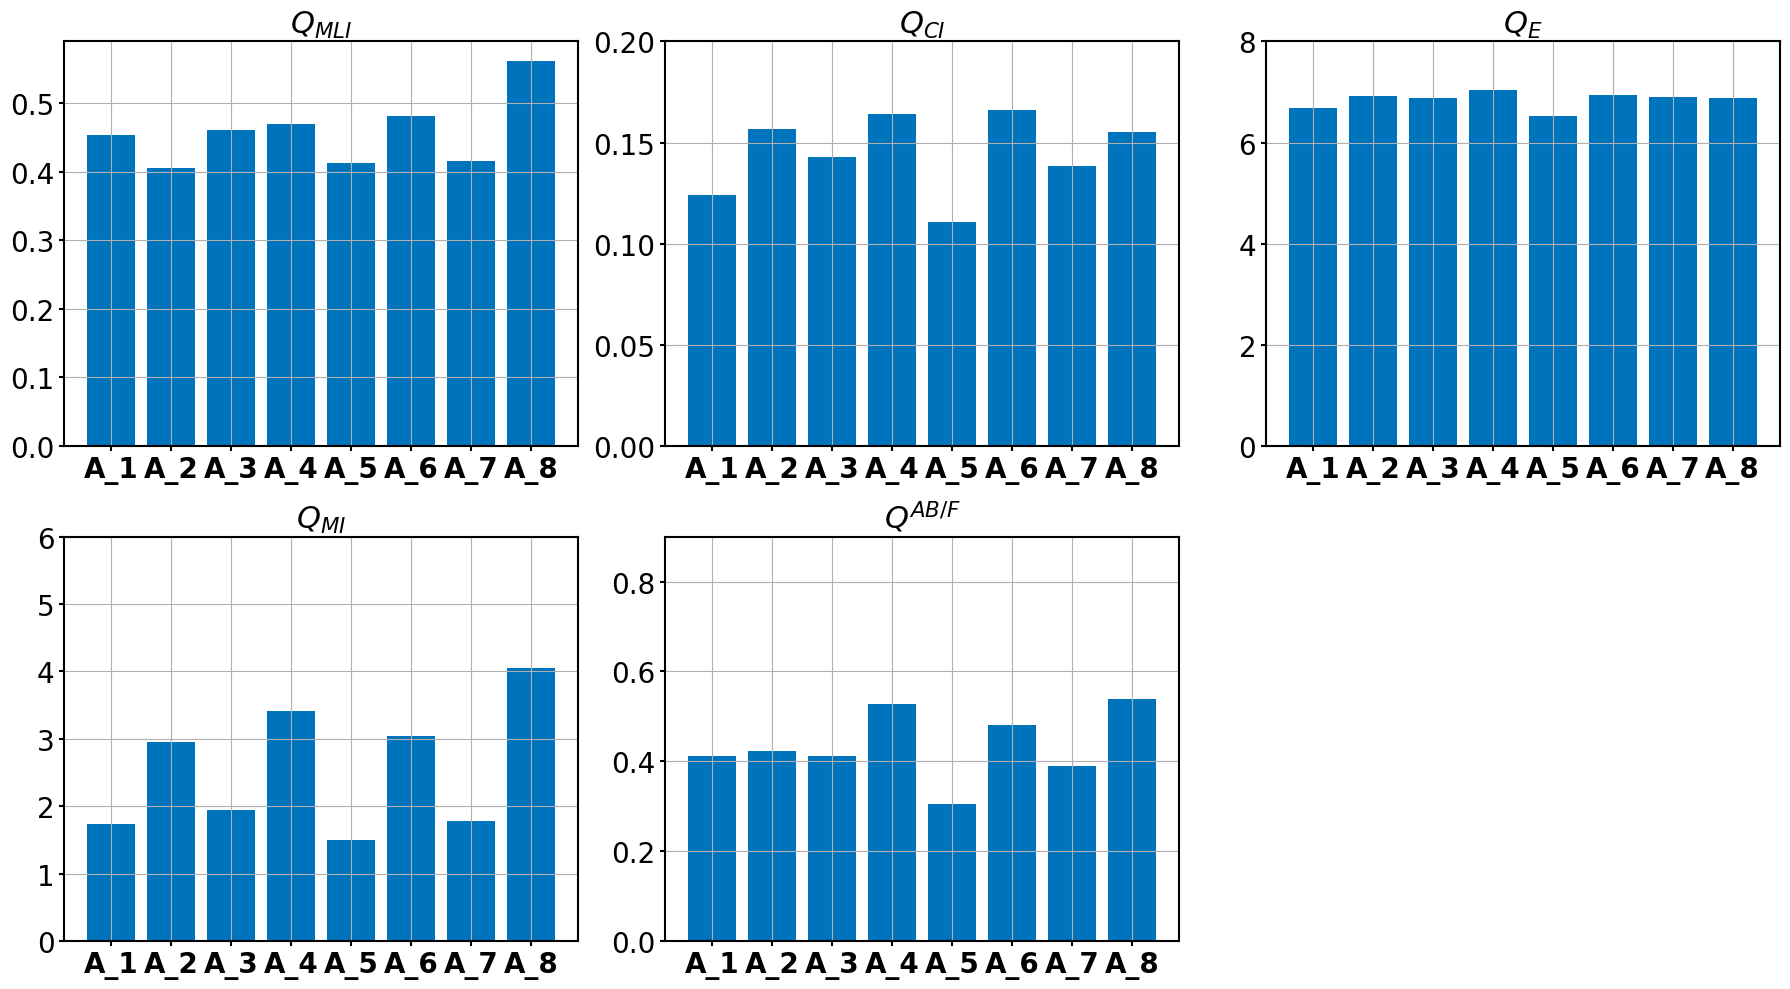

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# ===== Dataset D2 =====
methods = ['A_1','A_2','A_3','A_4','A_5','A_6','A_7','A_8']

MLI  = [0.4530, 0.4058, 0.4610, 0.4699, 0.4131, 0.4813, 0.4150, 0.5619]
CI   = [0.1240, 0.1567, 0.1429, 0.1642, 0.1106, 0.1661, 0.1384, 0.1551]
EN   = [6.6769, 6.9189, 6.8851, 7.0465, 6.5243, 6.9450, 6.9053, 6.8886]
MI   = [1.7331, 2.9614, 1.9393, 3.4129, 1.5008, 3.0437, 1.7904, 4.0511]
QABF = [0.4128, 0.4241, 0.4129, 0.5270, 0.3061, 0.4818, 0.3897, 0.5397]

metrics = [MLI, CI, EN, MI, QABF]
metric_names = [r'$Q_{MLI}$', r'$Q_{CI}$', r'$Q_{E}$', r'$Q_{MI}$', r'$Q^{AB/F}$']

# ===== Vẽ subplot (2 hàng × 3 cột) =====
plt.figure(figsize=(18, 10))

for i, data in enumerate(metrics):
    ax = plt.subplot(2, 3, i + 1)
    ax.bar(methods, data, color=(0, 0.45, 0.74))  # xanh dương đậm
    
    ax.set_title(metric_names[i], fontsize=22, fontweight='bold')
    ax.set_xticklabels(methods, fontsize=20, fontweight='bold')
    ax.grid(True)

    # chỉnh font và độ dày trục
    ax.tick_params(axis='both', labelsize=20, width=1.5)
    for spine in ax.spines.values():
        spine.set_linewidth(1.5)

    # Giới hạn trục Y riêng
    if metric_names[i] == r'$Q_{CI}$':
        ax.set_ylim(0, 0.2)
    elif metric_names[i] == r'$Q_{E}$':
        ax.set_ylim(0, 8)
    elif metric_names[i] == r'$Q_{MI}$':
        ax.set_ylim(0, 6)
    elif metric_names[i] == r'$Q^{AB/F}$':
        ax.set_ylim(0, 0.9)

# Tiêu đề tổng (nếu cần)
# plt.suptitle('Comparison of Different Fusion Methods on Dataset D2',
#              fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show()

# ===== Lưu hình ảnh =====
# plt.savefig('DatasetD2_results.png', dpi=300, bbox_inches='tight')
